# **Table of Contents**
* [Normality Tests](#section_1)
    * [Shapiro](#section_2)
    * [Anderson](#section_3)
    ---
* [X-Y relation](#section_4)
    * [Pearson's Correlation (NN)](#section_5)
    * [TTest / ANOVA (NC) ](#section_6)
    * [Chi2 (CC) ](#section_7)
    ---
* [Parametric Tests](#section_9)
    * [2S Ind Ttest](#section_10)
    * [2S Rel Ttest ](#section_11)
    * [ANOVA](#section_12)
    ---
* [Non-Parametric Tests](#section_13)
    * [Mann-Whitney U](#section_14)
    * [Wilcoxon](#section_15)
    * [Kruskal](#section_16)

In [1]:
import  numpy             as  np
import  pandas            as  pd
import  matplotlib.pyplot as  plt
import  seaborn           as  sns

import  scipy.stats       as  stats
from    scipy.stats   import  shapiro

import warnings
warnings.simplefilter("ignore")

<a id='section_1'></a>
# **Normality Tests**

<a id='section_2'></a>
## **1. Shapiro**

In [2]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869,-3.817]

shapiro(data)

(0.9663008451461792, 0.8469410538673401)

* Output args --- stat & p-value
* p > alpha
* Data normal

<a id='section_3'></a>
## **2. Anderson**

In [3]:
data  =  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stats.anderson (data)

AndersonResult(statistic=0.4239737141854807, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

* consider significance_level : 5.
* p-val = 0.684
* p > 0.05
* Data is normal

<a id='section_4'></a>
# **X-Y relation**

<a id='section_5'></a>
# **1. Pearson's Corr**

**Tests whether two samples have a linear relationship.**

In [4]:
data1  =  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2  =  [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stats.pearsonr (data1 , data2)

(0.6879696368388863, 0.02787296951449617)

> Comments
    
        * If p > 0.05 ..... Probably independent

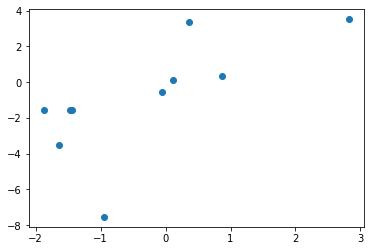

In [5]:
plt.scatter (data1 , data2)

<a id='section_9'></a>
# **Parametric Tests**

* Ttest tells whether 2 groups have the same mean.
* Ttest is estimated for:
    - One sample t test
    - Two sample t test (Ind, Rel)
---
* Assumption 
    - samples are randomly selected , independent 
    - and come from a normally distributed population with unknown but equal variances.

<a id='section_10'></a>
## **1S TTest**

* Tests whether claimed mean & observed mean are same or different

In [6]:
# Claimed mean = 98.6

temp  = np.array      ( [  98.56, 98.66, 97.54, 98.71, 99.22, 99.49, 98.14, 98.84,\
                           99.28, 98.48, 98.88, 97.29, 98.88, 99.07, 98.81, 99.49,\
                           98.57, 97.98, 97.75, 97.69, 99.28, 98.52, 98.82, 98.81, 98.22 ] )            

In [7]:
stats.ttest_1samp ( temp , 98.6 )

Ttest_1sampResult(statistic=-0.006668602694974534, pvalue=0.9947343867528586)

* p > 0.05
* Accept Null
* Means are same

<a id='section_10'></a>
## **2S Ind TTest**

* Tests whether the means of two independent samples are significantly different
* Ex : Weights of Male & Female 

In [8]:
M         =  [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]             # Male_weight
F         =  [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]             # Female_weight

stats.ttest_ind ( M , F )

Ttest_indResult(statistic=4.886344172533444, pvalue=0.00024034957515992796)

* p < 0.05
* Reject Null
* Means are different

<a id='section_11'></a>
## **2S Rel Ttest**

* Tests whether the means of two related samples are significantly different
* Ex : Weights of Male before and after joining a Gym

In [9]:
M1  =  [ 62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]
M2  =  [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

stats.ttest_rel ( M1, M2 )

Ttest_relResult(statistic=3.404831324883169, pvalue=0.0023297583680290364)

* p < 0.05
* Reject Null
* Means are different

<a id='section_12'></a>
## **3. ANOVA**

**Tests whether the means of two or more independent samples are significantly different.**

In [10]:
data1  =  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2  =  [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3  =  [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

stats.f_oneway (data1, data2, data3)

F_onewayResult(statistic=0.09641783499925058, pvalue=0.9083957433926546)

> Comments
    
        * p > alpha
        * Independent

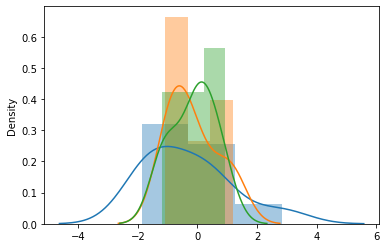

In [11]:
sns.distplot (data1)
sns.distplot (data2)
sns.distplot (data3)

<a id='section_13'></a>
# **Non-Parametric Tests**

<a id='section_14'></a>
## **1. Mann-Whitney U**

**Tests Dists of 2 IND samples --- equal or not.**

In [12]:
data1 =  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637,  -1.869]
data2 =  [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stats.mannwhitneyu (data1 , data2)

MannwhitneyuResult(statistic=40.0, pvalue=0.23633779675579358)

> Comments
    
        * p > alpha
        * Equal distributions

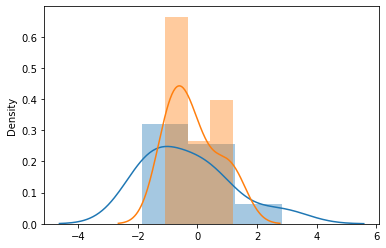

In [15]:
sns.distplot (data1)
sns.distplot (data2)

<a id='section_15'></a>
## **2. Wilcoxon**

**Tests Dists of 2 REL samples --- equal or not.**

In [16]:
from scipy.stats import wilcoxon

data1  =  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2  =  [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stats.wilcoxon (data1, data2)

WilcoxonResult(statistic=21.0, pvalue=0.5076243443095237)

> Comments
    
        * p > 0.05
        * Equal dists

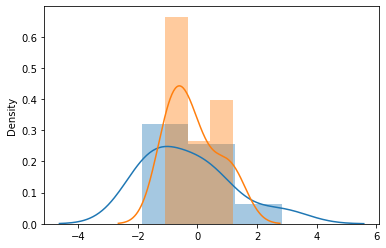

In [17]:
sns.distplot (data1)
sns.distplot (data2)

<a id='section_16'></a>
## **3. Kruskal**

**Tests Dists of >=2 IND samples --- equal or not.**

In [18]:
data1   =   [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2   =   [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3   =   [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

stats.kruskal (data1, data2, data3)

KruskalResult(statistic=0.8541935483870873, pvalue=0.6524004136489587)

> Comments
    
        * p > 0.05
        * Equal distributions

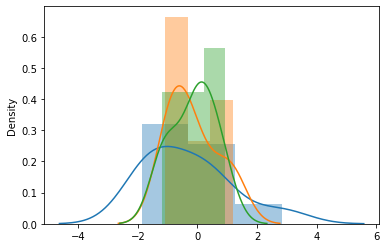

In [19]:
sns.distplot (data1)
sns.distplot (data2)
sns.distplot (data3)